In [43]:
import tensorflow as tf
import gym
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

[2017-02-28 13:22:06,394] Making new env: FrozenLake-v0


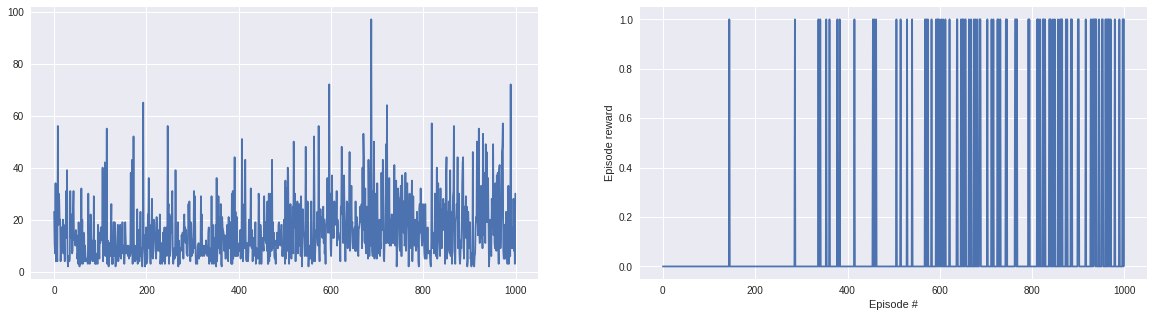

In [134]:
env = gym.make('FrozenLake-v0')

seed the gym and the 
env.seed(1234)
np.random.seed(1234)

n_states = env.observation_space.n
n_actions = env.action_space.n

discount = .9
learning_rate = .1
n_episodes = 1000
epsilon = 0.2

q = np.zeros((n_states, n_actions), dtype=np.float)
v = np.zeros((n_states, n_actions), dtype=np.float)

episode_steps = []
episode_rewards = []

for _ in range(n_episodes):
    done = False
    n_steps = 0
    r_total = 0

    # initialise state
    s = env.reset()

    while not done:

        # choose action from state using q
        a = np.random.choice(env.action_space.n) if np.random.random() < epsilon else np.argmax(q[s,:])

        # take action (returns: observation, reward, done, info)
        s_next, r, done, _ = env.step(a)

        # update q
        q[s,a] += learning_rate * (r + discount * np.max(q[s_next,:]) - q[s,a])
        
        s = s_next

        n_steps += 1
        r_total += r

#     print('Episode took %d steps' % n_steps)
    episode_steps.append(n_steps)
    episode_rewards.append(r_total)
    

fig, ax = plt.subplots(1,2, figsize=(20, 5))

ax[0].plot(range(episode_steps.__len__()), episode_steps)
plt.ylabel('Episode length')
plt.xlabel('Episode #')

ax[1].plot(range(episode_rewards.__len__()), episode_rewards)
plt.ylabel('Episode reward')
plt.xlabel('Episode #')
plt.show()
